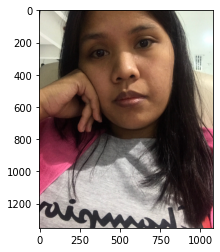

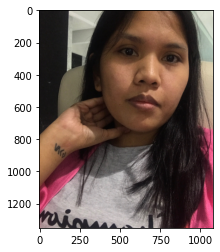

Age:28
Bio:
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


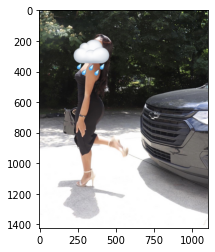

Age:24
Bio:A girl who loves life and honesty
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


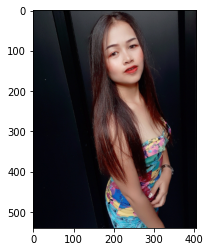

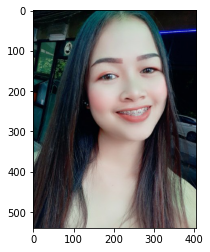

Age:23
Bio:
----------------------------------------------
Like:1, Dislike:0. Your decision: 1
Likes Remaining: 100


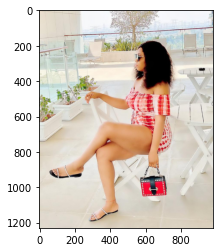

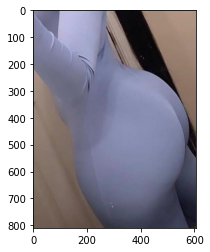

Age:23
Bio:I am all you ever wanted 😋
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


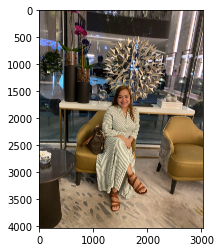

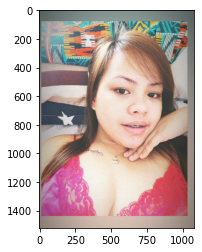

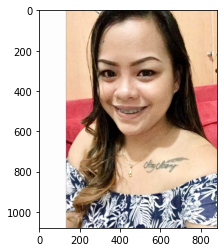

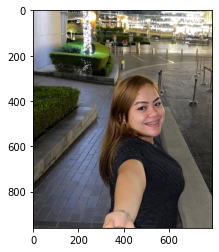

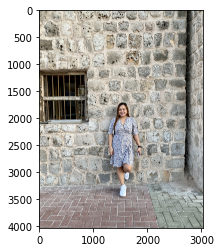

Age:26
Bio:Dating to marry. If you are here for past time only then please don’t swipe right. I do block rude people. I’ll be nice if you will treat me nice. Working in Dubai as healthcare assistant, so Im into caring people especially kids. Road trip is one of my favorite hobbies and reading books as well. Hoping to have the same interest. Bless you 😉
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


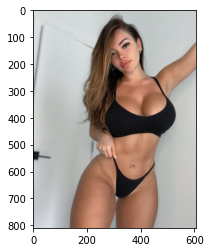

Age:22
Bio:
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


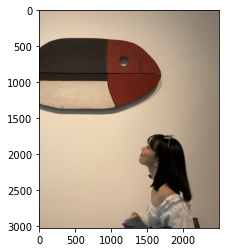

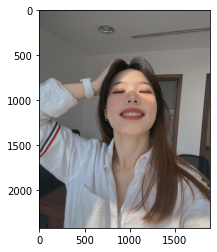

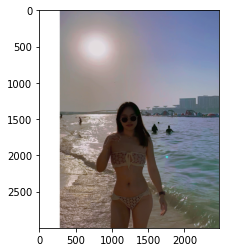

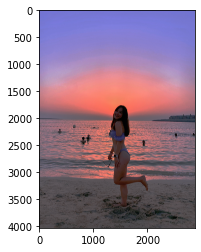

Age:24
Bio:It sounds like you are the only one who‘s fucked up, believe me get over yourself please. The truth is everyone is fucked up, no exception.

Made in China, still fabulous 🤷🏻‍♀️
----------------------------------------------
Like:1, Dislike:0. Your decision: 1
Likes Remaining: 100


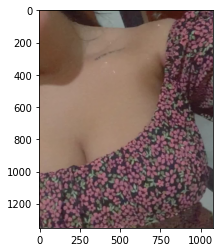

Age:22
Bio:
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


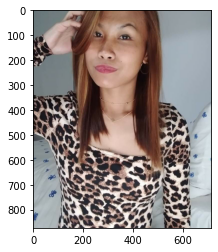

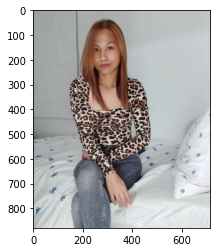

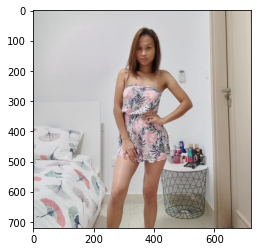

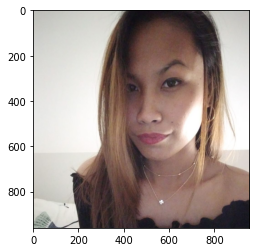

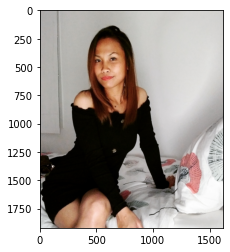

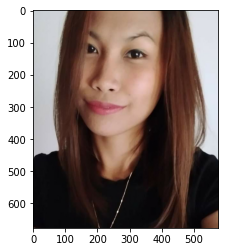

Age:27
Bio:
----------------------------------------------
Like:1, Dislike:0. Your decision: 9
Likes Remaining: 100


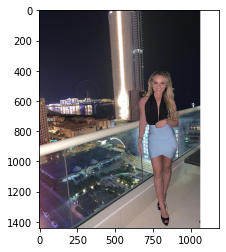

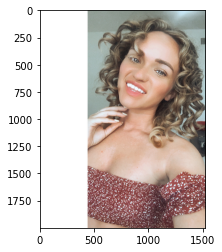

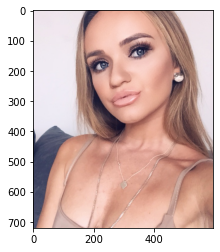

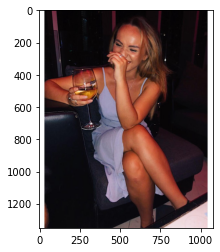

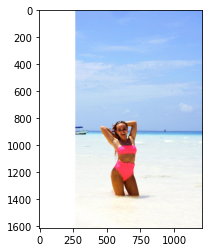

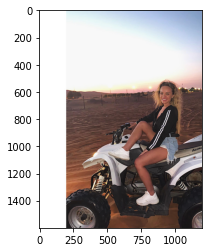

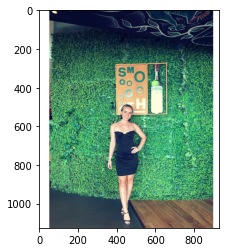

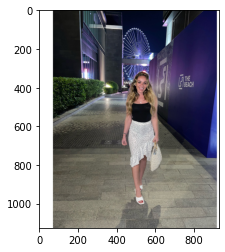

Age:28
Bio:Danielle 😚
Instagram: daniella_carlyle 📸
Newcastle United ⚽️
Geordie 🙋🏽‍♀️
Adventures ✈️ 
I sell houses 🏘
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


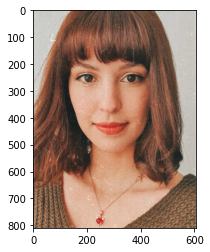

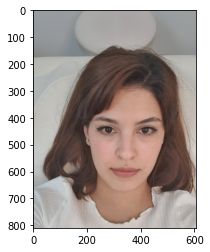

Age:25
Bio:I like potatoes and hentai
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


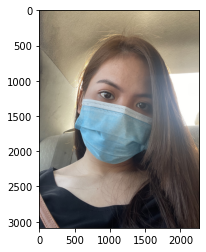

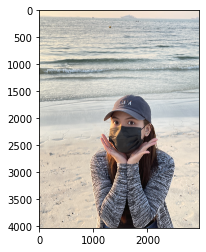

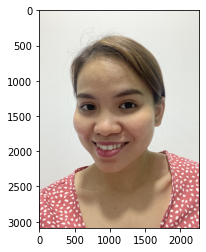

Age:24
Bio:
----------------------------------------------
Like:1, Dislike:0. Your decision: 9
Likes Remaining: 100


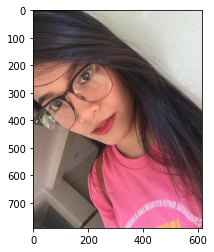

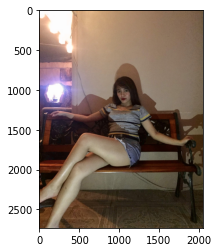

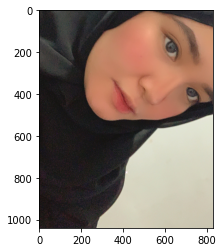

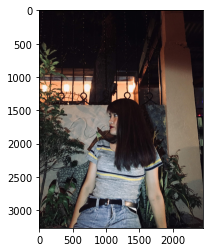

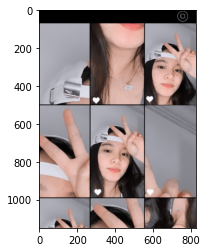

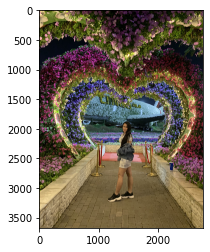

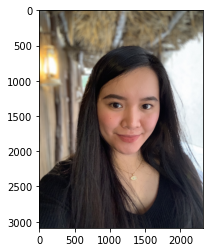

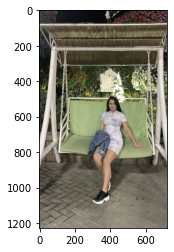

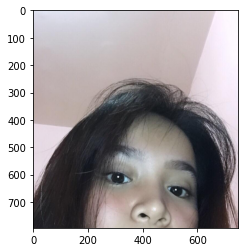

Age:23
Bio:Don’t! Just don’t
----------------------------------------------
Like:1, Dislike:0. Your decision: 9
Likes Remaining: 100


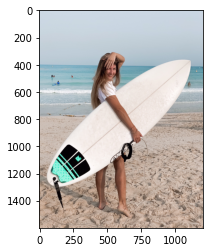

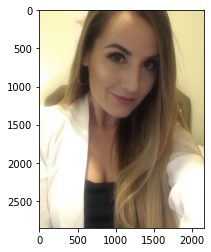

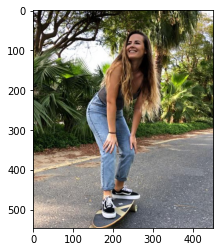

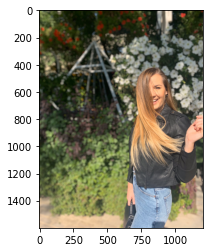

Age:29
Bio:Funny gifs are always appreciated 🤓
----------------------------------------------
Like:1, Dislike:0. Your decision: 9
Likes Remaining: 100


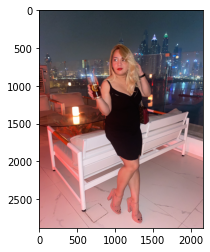

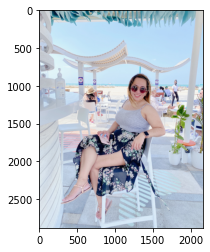

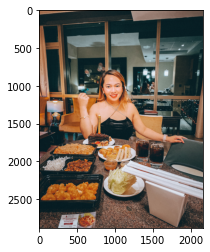

Age:28
Bio:Just want to be a little less lonely
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


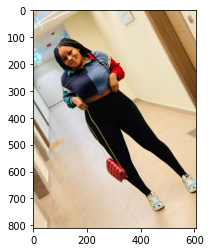

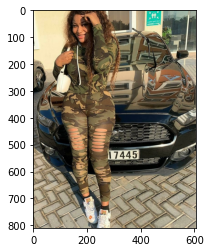

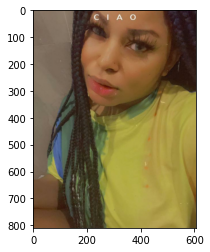

Age:23
Bio:
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


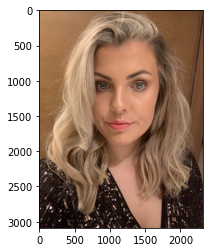

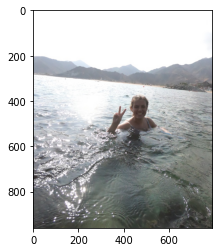

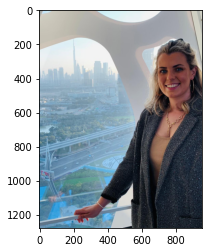

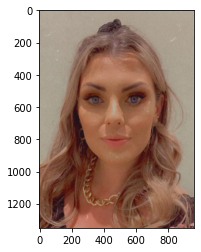

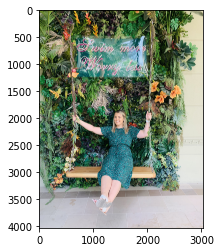

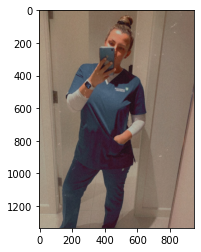

Age:28
Bio:British nurse in Dubai ✌️
Not looking for “hi how are you”. Looking for someone interesting with life experiences that can tell me all about it 🗺
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


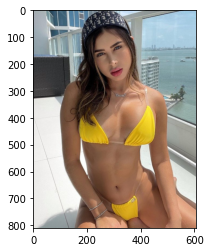

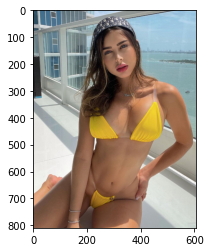

Age:22
Bio:
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


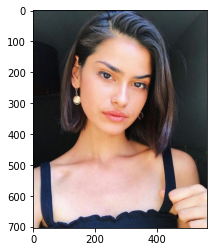

Age:22
Bio:Here for friends.. 
On a different vibe👽
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


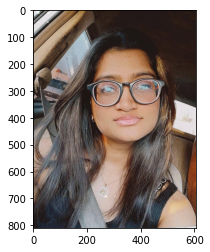

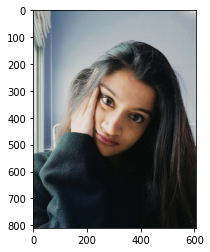

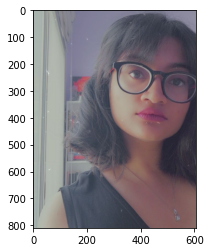

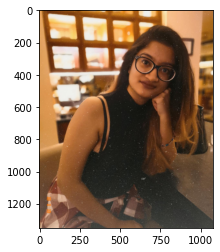

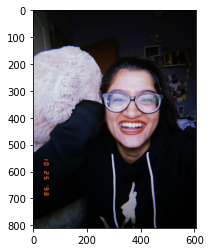

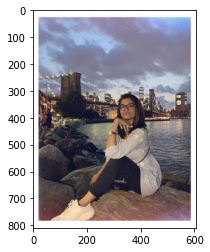

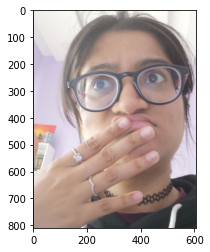

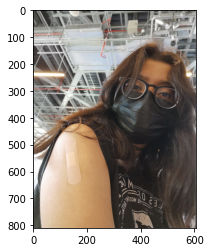

Age:24
Bio:Ok you're hot but are you vaccinated? 
----------------------------------------------
Like:1, Dislike:0. Your decision: 9
Likes Remaining: 100


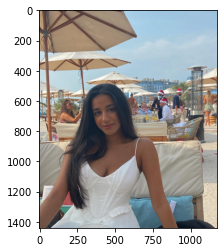

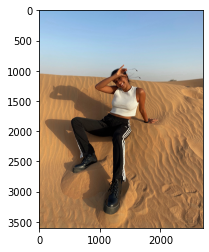

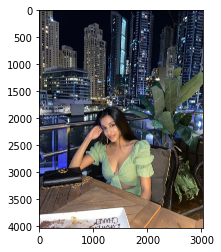

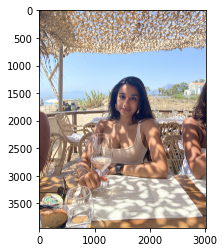

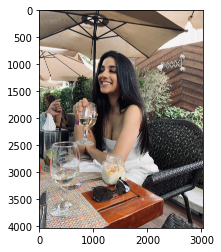

Age:27
Bio:Leeds / Dubai 
Insta: @chareyr
----------------------------------------------
Like:1, Dislike:0. Your decision: 2
Likes Remaining: 100


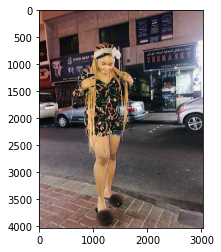

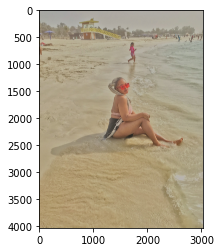

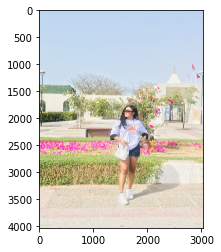

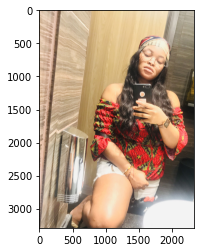

Age:22
Bio:
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


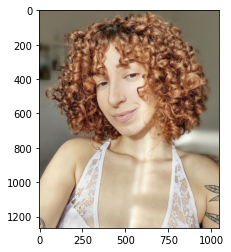

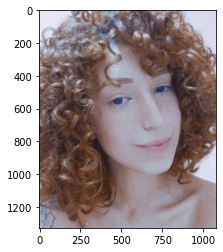

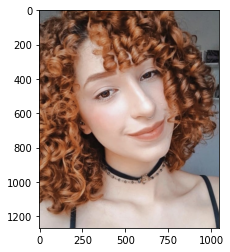

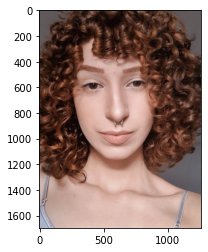

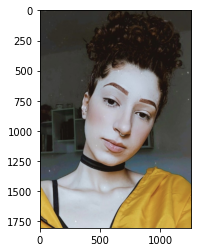

Age:25
Bio:Canadian who spent the last decade in London working in media/events. New to Dubai, hates shopping malls, looking for like-minded people to have a bit of a laugh with!
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


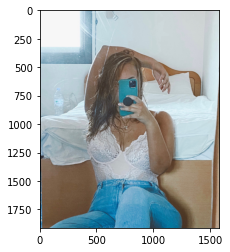

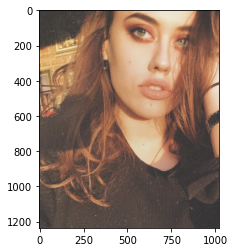

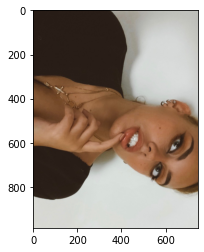

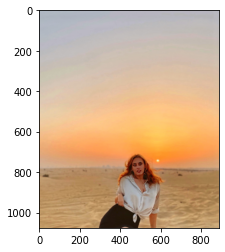

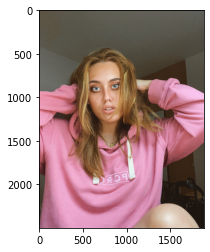

Age:22
Bio:Yes, I am Romanian. No, I will not steal your wallet (no guarantee though).
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


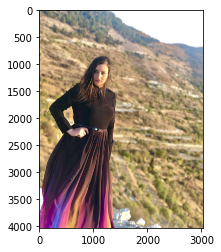

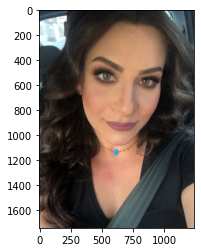

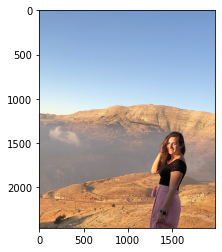

Age:29
Bio:🐈 🍱 ✈️  🌅

If you don’t like cats, don’t waste my time.
----------------------------------------------
Like:1, Dislike:0. Your decision: 0


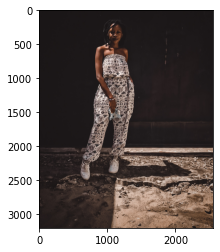

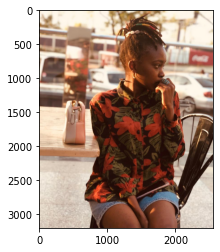

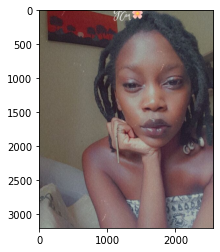

Age:25
Bio:Am an African Woman,Happy being black I do like friendship and am happy being the part of Africa,I do like movies,Dinner,History and travelling
----------------------------------------------


KeyboardInterrupt: Interrupted by user

In [55]:
%matplotlib inline
# from config import TOKEN
from utils.features import check_sluts
from utils.main_apis import TinderAPI
from utils.features import calculate_age
import matplotlib.pyplot as plt
from skimage import io

plt.close('all')

# https://github.com/MMcintire96/python_TinderAPI
tinderApi = TinderAPI(TOKEN)

# Get Tinder Recommendations of people around you
# recommendations = main_apis.get_recommendations()

# Get updates since certain date
# tinderApi.get_updates("2021-04-24T10:28:13.392Z")

while True:
    recommendations_v2 = tinderApi.get_recs_v2()
    for rec in recommendations_v2['data']['results']:
        user_id = rec['user']['_id']
        if rec.get('distance_mi') * 1.6 > 50:
            # but if city is Dubai => continue
            if rec['user'].get('city') and rec['user'].get('city').get('name') in ['Dubai', 'Дубай']:
                pass
            else:
                tinderApi.dislike(user_id)
        elif rec['user'].get('city') and rec['user'].get('city').get('name') != 'Dubai':
            tinderApi.dislike(user_id)
        elif check_sluts(rec):
            tinderApi.dislike(user_id)
        else:
            figs = []
            for photo in rec['user']['photos']:
                fig, ax = plt.subplots()
                figs.append(fig)
                url = photo['url']
                image = io.imread(url)
                ax.imshow(image)
                plt.show(block=False)
            print(f'Age:{calculate_age(rec["user"]["birth_date"])}')
            print(f'Bio:{rec["user"]["bio"]}')
            print('----------------------------------------------')
            decision = bool(int(input("Like:1, Dislike:0. Your decision: ")))
            if decision:
                resp = tinderApi.like(user_id)
                print("Likes Remaining:", resp['likes_remaining'])
            else:
                tinderApi.dislike(user_id)
            for fig in figs:    
                plt.close(fig)


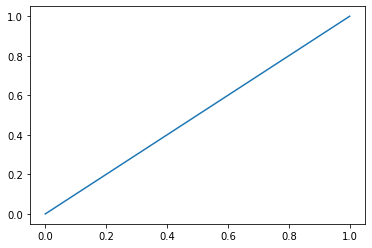

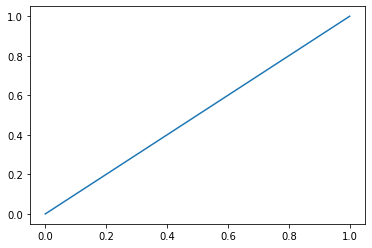

In [53]:
plt.ion()
%matplotlib inline
import matplotlib.pyplot as plt

fig1 = plt.figure() # create first figure
plt.plot([0, 1], [0, 1])

fig2 = plt.figure() # create second figure
plt.plot([0, 1], [0, 1])

plt.ion()
plt.show(block=False)
plt.pause(3)
plt.close(fig1) # close first figure although second one is active

plt.close('all')